In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

# Equations and boundary conditions
$$
\frac{1}{\xi^2} \frac{d}{d\xi}\left( \xi^2 \frac{d\theta_n}{d\xi} \right)=-\theta_n^n
$$

$$
\theta_n(0)=1,\quad \frac{d\theta_n}{d\xi}=0\text{ at }\xi=0, \quad \theta_n \rightarrow 0 \text{ at surface}
$$

$$
x=\xi,\quad y=\theta_n,\quad z=\frac{d\theta_n}{d\xi}=\frac{dy}{dx}
$$

$$
y' = \frac{dy}{dx}=z
$$

$$
z' = \frac{dz}{dx}=-y^n-\frac{2}{x}z
$$

In [33]:
def func(x, theta, n):
    y, z = theta
    
    f1 = z
    if x > 0:
        f2 = -y**n - 2 * z / x
    else:
        f2 = 2 / 3 - y**n
    
    return f1, f2

ns = np.linspace(2, 4, 10)

In [66]:
from scipy.integrate import solve_ivp

x = np.linspace(0, 20)
y0 = (1, 0)
ress = [solve_ivp(lambda t, theta: func(t, theta, n),(0,50), y0, t_eval=x) for n in ns]

C:\Users\miles\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\miles\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:140: RuntimeWarning: invalid value encountered in maximum
  scale = atol + np.maximum(np.abs(y), np.abs(y_new)) * rtol
C:\Users\miles\Anaconda3\lib\site-packages\scipy\integrate\_ivp\rk.py:145: RuntimeWarning: divide by zero encountered in double_scalars
  max(1, SAFETY * error_norm ** (-1 / (order + 1))))


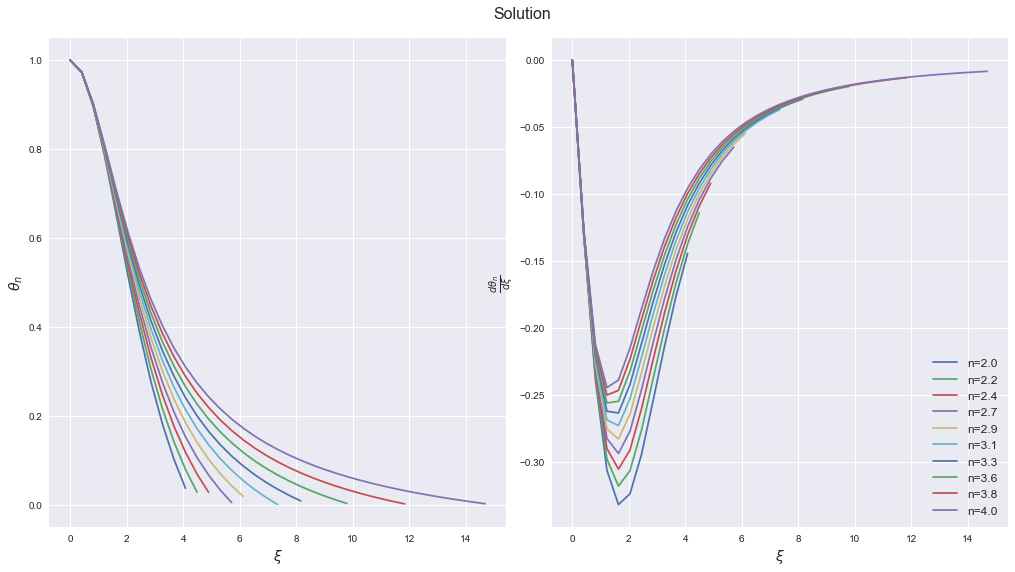

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(14,8))
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

for res, val in zip(ress, ns):
    mask = (res.y[0] >= 0) & (res.y[0] <= 1)
    x = res.t[mask]
    y = res.y[0][mask]
    z = res.y[1][mask]
    axes[0].plot(x, y, label=f'n={val:.1f}')
    axes[1].plot(x, z, label=f'n={val:.1f}')
    
axes[1].legend(fontsize=12)
[ax.set_xlabel(r'$\xi$', fontsize=14) for ax in axes]
axes[0].set_ylabel(r'$\theta_n$', fontsize=14)
axes[1].set_ylabel(r'$\frac{d \theta_n}{d \xi}$', fontsize=14)
plt.suptitle('Solution', fontsize=16)
plt.subplots_adjust(wspace=0.1)